# Categorical optimization using EBNA and UMDAcat

In this notebook we use the EBNA and UMDAcat approaches to optimize a toy categorical optimization function. Note that EBNA learns and samples a discrete BN in each iteration, while UMDAcat uses an independent probability distribution for each of the variables.

Import the algorithm and the benchmarks from EDAspy

In [3]:
from EDAspy.optimization import EBNA, UMDAcat
import numpy as np

Let's define a toy example categorical cost function, where each solution to be evaluated is an array of categorical objects.

In [4]:
def categorical_cost_function(solution: np.array):
    """
    Example cost function that assigns costs to categorical choices.
    The cost function returns higher values for less desirable choices.
    """
    # Define a cost dictionary where each choice has an associated cost
    cost_dict = {
        'Color': {'Red': 0.1, 'Green': 0.5, 'Blue': 0.3},
        'Shape': {'Circle': 0.3, 'Square': 0.2, 'Triangle': 0.4},
        'Size': {'Small': 0.4, 'Medium': 0.2, 'Large': 0.1}
    }
    keys = list(cost_dict.keys())
    choices = {keys[i]: solution[i] for i in range(len(solution))}

    total_cost = 0.0
    for variable, choice in choices.items():
        total_cost += cost_dict[variable][choice]

    return total_cost

We initialize both algorithms

In [5]:
variables = ['Color', 'Shape', 'Size']
possible_values = np.array([
    ['Red', 'Green', 'Blue'],
    ['Circle', 'Square', 'Triangle'],
    ['Small', 'Medium', 'Large']], dtype=object
)

frequency = np.array([
    [.33, .33, .33],
    [.33, .33, .33],
    [.33, .33, .33]], dtype=object
)

n_variables = len(variables)

In [7]:
ebna = EBNA(size_gen=10, max_iter=10, dead_iter=10, n_variables=n_variables, alpha=0.5,
            possible_values=possible_values, frequency=frequency)

umda_cat = UMDAcat(size_gen=10, max_iter=100, dead_iter=10, n_variables=n_variables, alpha=0.5,
                   frequency=frequency, possible_values=possible_values)

In [8]:
ebna_result = ebna.minimize(categorical_cost_function, True)

IT:  0 	Best cost:  0.4
IT:  1 	Best cost:  0.4
IT:  2 	Best cost:  0.4
IT:  3 	Best cost:  0.4
IT:  4 	Best cost:  0.4
IT:  5 	Best cost:  0.4
IT:  6 	Best cost:  0.4
IT:  7 	Best cost:  0.4
IT:  8 	Best cost:  0.4
	NFEVALS = 200 F = 0.4
	X = ['Red' 'Square' 'Large']


In [9]:
umda_cat_result = umda_cat.minimize(categorical_cost_function, True)

IT:  0 	Best cost:  0.4
IT:  1 	Best cost:  0.4
IT:  2 	Best cost:  0.4
IT:  3 	Best cost:  0.4
IT:  4 	Best cost:  0.4
IT:  5 	Best cost:  0.4
IT:  6 	Best cost:  0.4
IT:  7 	Best cost:  0.4
IT:  8 	Best cost:  0.4
IT:  9 	Best cost:  0.4
	NFEVALS = 1200 F = 0.4
	X = ['Red' 'Square' 'Large']


Let's analyze the convergence plot for the executed algorithms.

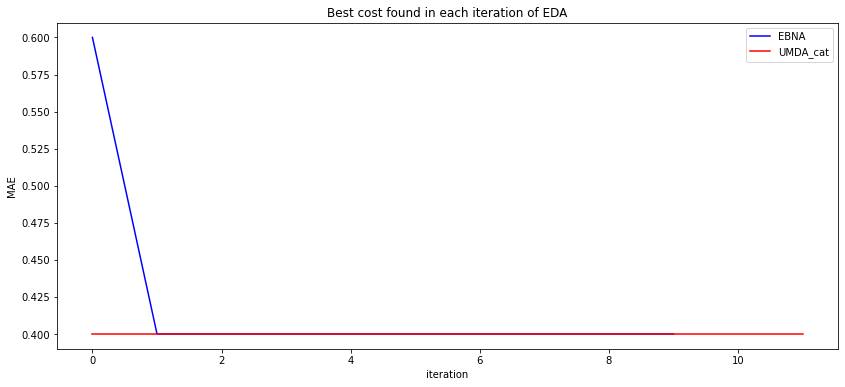

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14,6))

plt.title('Best cost found in each iteration of EDA')
plt.plot(list(range(len(ebna_result.history))), ebna_result.history, color='b', label='EBNA')
plt.plot(list(range(len(umda_cat_result.history))), umda_cat_result.history, color='r', label='UMDA_cat')
plt.xlabel('iteration')
plt.ylabel('MAE')
plt.legend()
plt.show()

It is also possible to analyze the fnal BN structure for the case of EBNA (UMDAcat does not uses graph based probabilistic models). EDAspy provides some tools to do this.

In this case, the results shows not arcs between variables.

In [12]:
from EDAspy.optimization import plot_bn

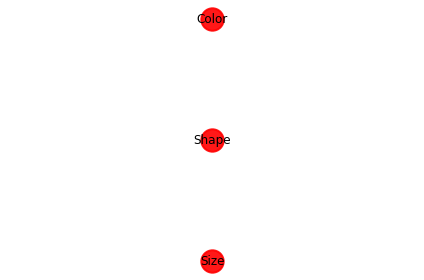

In [15]:
plot_bn(ebna.pm.print_structure(), var_names=variables)